In [13]:
#import get to call a get request on the site
import requests

#import to manipulate arrays with numpy
import numpy as np

#import to create, clean, and parse data frames with pandas
import pandas as pd

#import to enable datascraping
from bs4 import BeautifulSoup

#import to set up 'sleep' to wait between page loads
import time

import timeit

# import Mongo so our webscraper dumps its scraped data without losing it
from pymongo import MongoClient
import pymongo

#import to make that html readable
import pprint

#import regular expressions operations
import re

#import to get the universe in balance
import random


from dateutil.parser import parse

#import so we can do some heavy stats work
import scipy as sp
from scipy.stats import binom
import scipy.stats as stats

#import to access certain plotting features
import seaborn as sns

#import because we need its program functions
import math

from sklearn import neighbors, datasets, tree, svm, preprocessing, utils
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import log_loss, classification_report, confusion_matrix, mean_squared_error, accuracy_score

#import because we need to plot and make it pretty
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
plt.style.use('ggplot')

In [14]:
df = pd.read_csv('motorcycle_model_ready_data')

In [15]:
df.drop(df.columns[0], axis=1, inplace=True)

In [16]:
keepidx = (df.title.drop_duplicates().index)
df = df.loc[keepidx].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17583 entries, 0 to 27767
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           17583 non-null  object 
 1   year            17583 non-null  float64
 2   price           17583 non-null  float64
 3   neighborhood    15711 non-null  object 
 4   description     17583 non-null  object 
 5   url             17583 non-null  object 
 6   model           17583 non-null  object 
 7   vin             17583 non-null  int64  
 8   condition       17583 non-null  int64  
 9   cryptocurrency  17583 non-null  int64  
 10  delivery        17583 non-null  int64  
 11  engine_size     17583 non-null  float64
 12  fuel_type       16897 non-null  object 
 13  mileage         17583 non-null  float64
 14  color           17543 non-null  object 
 15  street_legal    17583 non-null  int64  
 16  title_status    17567 non-null  object 
 17  transmission    17583 non-null 

In [17]:
df = df.reset_index(drop=True)

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17583 entries, 0 to 17582
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           17583 non-null  object 
 1   year            17583 non-null  float64
 2   price           17583 non-null  float64
 3   neighborhood    15711 non-null  object 
 4   description     17583 non-null  object 
 5   url             17583 non-null  object 
 6   model           17583 non-null  object 
 7   vin             17583 non-null  int64  
 8   condition       17583 non-null  int64  
 9   cryptocurrency  17583 non-null  int64  
 10  delivery        17583 non-null  int64  
 11  engine_size     17583 non-null  float64
 12  fuel_type       16897 non-null  object 
 13  mileage         17583 non-null  float64
 14  color           17543 non-null  object 
 15  street_legal    17583 non-null  int64  
 16  title_status    17567 non-null  object 
 17  transmission    17583 non-null 

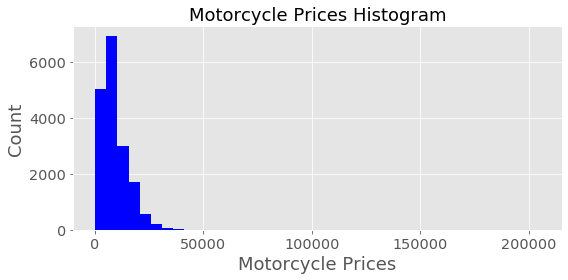

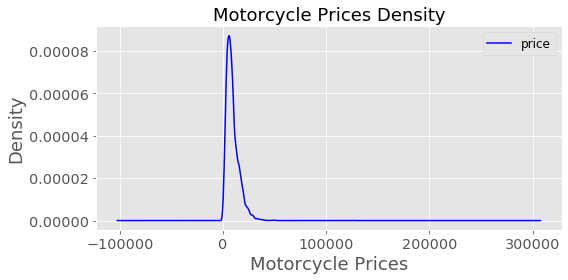

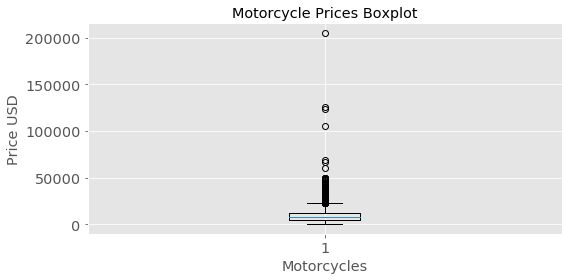

In [20]:
# Let's build some plots and view our price data with a different perspective
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.hist(df['price'], color = 'blue', bins = 40)
plt.xlabel("Motorcycle Prices", fontsize=18)
plt.ylabel("Count", fontsize=18);
plt.title("Motorcycle Prices Histogram", fontsize=18);
plt.tight_layout()
plt.show()

price=df['price'].astype(float)
price.plot.density(color ='blue')
plt.legend(fontsize=12)
plt.xlabel("Motorcycle Prices", fontsize=18)
plt.ylabel("Density", fontsize=18);
plt.title("Motorcycle Prices Density", fontsize=18);
plt.tight_layout()
plt.show()


params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.boxplot(df['price'].array)
plt.xlabel("Motorcycles")
plt.ylabel("Price USD")
plt.title("Motorcycle Prices Boxplot")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'years plotted by row')

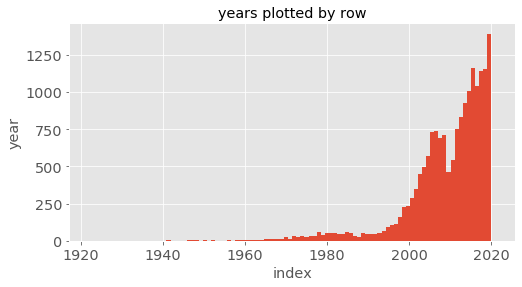

In [21]:
plt.hist(df['year'], 100)
plt.xlabel('index')
plt.ylabel('year')
plt.title('years plotted by row')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17583 entries, 0 to 17582
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           17583 non-null  object 
 1   year            17583 non-null  float64
 2   price           17583 non-null  float64
 3   neighborhood    15711 non-null  object 
 4   description     17583 non-null  object 
 5   url             17583 non-null  object 
 6   model           17583 non-null  object 
 7   vin             17583 non-null  int64  
 8   condition       17583 non-null  int64  
 9   cryptocurrency  17583 non-null  int64  
 10  delivery        17583 non-null  int64  
 11  engine_size     17583 non-null  float64
 12  fuel_type       16897 non-null  object 
 13  mileage         17583 non-null  float64
 14  color           17543 non-null  object 
 15  street_legal    17583 non-null  int64  
 16  title_status    17567 non-null  object 
 17  transmission    17583 non-null 

In [23]:
X1 = df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'dual-', 'brown', 'stand', 'bobbe', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot'], axis=1).to_numpy()
y1 = df['price'].to_numpy()

In [24]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.33, random_state=0)

rf1 = RandomForestRegressor(n_estimators=200, oob_score=True)
rf1.fit(X1_train, y1_train)
y_pred = rf1.predict(X1_test)

In [25]:
print('R Squared : ','\t\t', rf1.score(X1_test, y1_test))
print('Out of Bag Score : ','\t', rf1.oob_score_)
print('Mean Squared Error : ', mean_squared_error(y1_test, y_pred))

R Squared :  		 0.37402410030550404
Out of Bag Score :  	 0.2978793992727644
Mean Squared Error :  24415801.1522926


In [26]:
np.sqrt(mean_squared_error(y1_test, y_pred))

4941.234780122535

In [27]:
for idx,_ in enumerate(y1_test - y_pred):
    print(y1_test[idx], '\t\t',':',_)

9599.0 		 : -924.2800000000007
1975.0 		 : 243.41000000000008
8995.0 		 : -784.0200000000004
3495.0 		 : -3405.6533333333336
11971.0 		 : -4642.294999999998
7800.0 		 : 899.2234845897774
8900.0 		 : -95.51458333333358
11500.0 		 : 3223.08
8000.0 		 : -2563.08
11800.0 		 : 872.5349999999999
5700.0 		 : -1863.8400000000001
8000.0 		 : -407.60499999999956
13900.0 		 : 3085.9300000000003
5000.0 		 : -590.4595224149161
7999.0 		 : 163.09000000000015
23999.0 		 : 7836.084999999999
6000.0 		 : -1839.8900000000003
14988.0 		 : 6865.48
5999.0 		 : -553.2200000000003
4500.0 		 : -2609.1850000000004
11700.0 		 : -224.8199999999997
4800.0 		 : -9828.65
7000.0 		 : -1007.0600000000004
800.0 		 : -1230.946272824397
5899.0 		 : -4448.57
6000.0 		 : -3501.705
24995.0 		 : 11259.295
3200.0 		 : -487.73
4950.0 		 : -1945.8130952380961
14900.0 		 : 10143.205
6000.0 		 : 136.66333333333478
11000.0 		 : 8027.075729825731
5400.0 		 : -7005.89055
13650.0 		 : -1271.4824710653866
11900.0 		 : -154.95833333333

20000.0 		 : -3523.7700000000004
9995.0 		 : 137.45000000000073
20499.0 		 : 6366.863687665238
5000.0 		 : -3961.4799999999996
6000.0 		 : -999.0450000000001
6100.0 		 : -3417.0499999999993
12995.0 		 : -545.7299999999996
1999.0 		 : -1351.4250000000002
7698.0 		 : -18.68440018314959
13000.0 		 : -2046.67
12799.0 		 : 4834.377362846205
6500.0 		 : -881.835
15999.0 		 : 2537.879999999999
8000.0 		 : -76.76500000000033
3099.0 		 : 435.55767149517214
6899.0 		 : -2106.8899999999994
17500.0 		 : 5607.859999999997
5750.0 		 : -1764.7250000000004
15000.0 		 : -8268.785
12750.0 		 : -1558.6800000000003
20899.0 		 : 4119.875
18500.0 		 : 10646.998925475853
3500.0 		 : -2647.22604199709
4000.0 		 : -5055.000726190474
5800.0 		 : -2136.4399999999996
14500.0 		 : -1763.1149999999998
13495.0 		 : 1546.9599999999991
7500.0 		 : -178.97702367536567
13499.0 		 : -4035.1850000000013
3999.0 		 : -12940.671696428573
12399.0 		 : 1592.870775546362
2800.0 		 : -2581.3859898640503
9000.0 		 : 2758.97000000

5999.0 		 : -4722.706205214417
18995.0 		 : 6043.67
7000.0 		 : -35479.12666666666
10499.0 		 : -10654.61
7500.0 		 : 231.9350000000004
9495.0 		 : -4157.73
25000.0 		 : 12802.68
8900.0 		 : -735.5081349206375
4000.0 		 : -9413.464439903637
25499.0 		 : -3043.654999999999
4800.0 		 : -12198.413333333334
10500.0 		 : 1811.7749999999996
7499.0 		 : 347.21000000000004
13988.0 		 : 4579.475
7000.0 		 : -1203.6049999999996
2799.0 		 : -1178.755
3200.0 		 : -5173.527852322568
3500.0 		 : -31.77500000000009
9000.0 		 : -1730.5699999999997
8795.0 		 : 1014.2150000000001
5100.0 		 : -489.5799999999999
24999.0 		 : 8149.294999999998
4995.0 		 : 128.64000000000033
5995.0 		 : -3932.533333333333
6200.0 		 : 625.3400000000001
18900.0 		 : -773.5800000000017
21499.0 		 : 11741.60402249469
25000.0 		 : 15242.60402249469
5500.0 		 : -2112.5164166666673
10500.0 		 : -2762.3899999999994
7990.0 		 : -1226.0053845685416
23000.0 		 : 15391.189999999999
9500.0 		 : 1899.3149999999996
11800.0 		 : -705.16116

10000.0 		 : -706.9249999999993
6999.0 		 : -1160.9300000000003
15495.0 		 : 4515.335802777776
12000.0 		 : 378.2099999999991
6995.0 		 : -1363.5100000000002
15000.0 		 : 3400.879999999999
3900.0 		 : -3929.4866666666667
6399.0 		 : -1899.4349999999995
11500.0 		 : -661.8099999999995
1200.0 		 : -713.0
1999.0 		 : -4148.22604199709
11777.0 		 : 464.404849999999
9399.0 		 : -1407.129224453638
6000.0 		 : -2729.2700000000004
14500.0 		 : 1975.875
18995.0 		 : 3318.3724999999995
9999.0 		 : 926.6900000000005
17995.0 		 : 2791.875
4799.0 		 : -6969.391165223666
14995.0 		 : 7195.64
9000.0 		 : 1157.0500000000002
3900.0 		 : -1482.5500000000002
5000.0 		 : 471.8699999999999
11900.0 		 : -1784.0599999999995
6800.0 		 : -1167.7005360254852
5500.0 		 : -560.3100000000004
7995.0 		 : 24.618333333333794
7999.0 		 : -3312.621985947324
9885.0 		 : 367.78499999999985
6399.0 		 : -5152.645
6699.0 		 : 1032.3853571428572
3995.0 		 : -2338.4700000000003
3299.0 		 : -34.315000000000055
4950.0 		 : 733.

10507.0 		 : -220.65555580778346
9500.0 		 : 3316.3523780386286
4700.0 		 : -545.6499999999996
3600.0 		 : -2160.2250000000004
11000.0 		 : -1172.3999999999996
7500.0 		 : -3773.033333333333
3400.0 		 : -3500.7765154102226
7000.0 		 : -3334.4445193483807
5500.0 		 : -21.220000000000255
11379.0 		 : -1538.2000000000007
3995.0 		 : -2383.2133333333322
6300.0 		 : -6418.48
3100.0 		 : -85.91499999999996
7999.0 		 : -3539.625
5200.0 		 : -48.777115790219796
12900.0 		 : 2554.385
19999.0 		 : 7652.395
13000.0 		 : -2183.385
5995.0 		 : 991.2150000000001
2000.0 		 : -4279.46
11000.0 		 : 591.8500000000004
13000.0 		 : -2732.4475
3900.0 		 : -5126.445
5500.0 		 : -4394.545
5650.0 		 : 1789.7583333333332
6200.0 		 : 1529.455
5495.0 		 : 830.9250000000002
5995.0 		 : -1595.29
999.0 		 : -700.05
1000.0 		 : -738.875
25000.0 		 : 12840.595
5000.0 		 : 999.2550000000001
7950.0 		 : 2568.6140101359497
6000.0 		 : -1884.7655925925928
21999.0 		 : 9988.58
8000.0 		 : 1435.8779166666664
1000.0 		 : -3

4500.0 		 : -3911.4699999999993
5500.0 		 : 770.629553571428
4200.0 		 : -315.2349999999997
2600.0 		 : 1071.695
4999.0 		 : -1604.3249999999998
4000.0 		 : -4353.730982212228
6550.0 		 : -775.4751500000002
12800.0 		 : 2740.0550000000003
16495.0 		 : 697.7549999999992
9999.0 		 : 4821.455
3999.0 		 : -7796.545134726832
14999.0 		 : 3203.4548652731683
7999.0 		 : 1851.7739580029101
12000.0 		 : -2900.66
15000.0 		 : 5004.1849999999995
24995.0 		 : 13472.72
13995.0 		 : 5659.375
9500.0 		 : -4063.584999999999
5499.0 		 : -3458.9500000000007
21899.0 		 : 14884.285
5200.0 		 : -528.5745781995784
8250.0 		 : 2638.1099999999997
5000.0 		 : -2967.7005360254852
8485.0 		 : -6826.305
12200.0 		 : 6052.77395800291
11500.0 		 : -4419.57
10500.0 		 : -930.9750000000004
3000.0 		 : 639.6149999999998
5500.0 		 : -4075.4699999999993
6990.0 		 : -6921.540000000001
9500.0 		 : 437.4291666666668
5800.0 		 : -4204.3725075489565
9999.0 		 : 1391.5599999999995
8900.0 		 : 1999.2234845897774
12888.0 		 : 1

7800.0 		 : 139.6800000000003
13950.0 		 : -5222.139999999999
5986.0 		 : -4703.504999999999
5500.0 		 : -187.48999999999978
6900.0 		 : -457.34000000000015
6500.0 		 : 1234.7799999999997
5975.0 		 : 1176.2200000000003
32500.0 		 : 22888.647750600936
17499.0 		 : 3031.2000000000007
27999.0 		 : 13269.265
13500.0 		 : -325.4150000000009
12995.0 		 : 5029.7925
20500.0 		 : 7739.533675462853
2399.0 		 : -264.44232850482786
6500.0 		 : 443.8900000000003
9500.0 		 : -857.4699999999993
6800.0 		 : 916.2299999999996
12995.0 		 : 6880.472142857142
5250.0 		 : -1521.46
800.0 		 : -1438.25
1900.0 		 : -687.1950000000002
6705.0 		 : -4022.6555558077835
8500.0 		 : -6113.735000000001
4000.0 		 : -84.48999999999978
10000.0 		 : 2321.0229763246343
13999.0 		 : -3174.0999999999985
6500.0 		 : 559.6300000000001
2700.0 		 : -1818.005
3999.0 		 : -15010.4632226801
3100.0 		 : -1063.4449999999997
8500.0 		 : 441.5975392172704
6000.0 		 : -428.64999999999964
7500.0 		 : -1330.8099999999995
6000.0 		 : -15

8500.0 		 : -2706.7614523809534
4299.0 		 : -1848.2260419970899
9999.0 		 : -1239.4699999999993
8500.0 		 : 394.27999999999975
13999.0 		 : -1542.3899999999994
7250.0 		 : -3163.0750000000007
4195.0 		 : 110.76999999999998
22449.0 		 : 10826.297899184638
6500.0 		 : -877.2649107142852
9999.0 		 : -5177.769999999997
5500.0 		 : -2311.2250000000004
4180.0 		 : 2576.85
29000.0 		 : 18925.625
6500.0 		 : 304.6400000000003
14000.0 		 : 1086.3850000000002
22221.0 		 : 2806.09
4750.0 		 : 301.18285714285776
6000.0 		 : -3216.0053845685416
8999.0 		 : -2990.75
8999.0 		 : -2140.58
6950.0 		 : 579.0050000000001
1200.0 		 : -2686.285912698414
13495.0 		 : -2092.70520238095
5700.0 		 : -179.31666666666752
795.0 		 : -1066.725
1200.0 		 : -9452.875
10500.0 		 : -1855.17
8500.0 		 : 434.0
12499.0 		 : 2494.6274924510435
2300.0 		 : -501.6750000000002
2200.0 		 : -2378.6825
8995.0 		 : 2151.5072145161284
5000.0 		 : -434.5450000000001
8893.0 		 : -1913.129224453638
6799.0 		 : 163.83500000000004
900

12000.0 		 : 3169.270406178559
18900.0 		 : 9635.083333333332
475.0 		 : -3714.837516962203
12981.0 		 : -2925.5200000000004
11900.0 		 : -2260.879999999999
4000.0 		 : -2370.606333333334
9500.0 		 : -2146.9750000000004
18999.0 		 : 3762.7614999999987
4200.0 		 : -1441.6450000000004
1195.0 		 : -3831.7950907837703
10200.0 		 : -1167.1849999999995
3400.0 		 : -8395.545134726832
15750.0 		 : 2989.5336754628534
5900.0 		 : -2339.1900000000005
6500.0 		 : -1408.9631818181815
15900.0 		 : 5895.6274924510435
13999.0 		 : 4946.995000000001
3999.0 		 : -2661.8149999999996
13499.0 		 : 2636.9300000000003
1200.0 		 : -243.44174999999996
16500.0 		 : 960.0049999999992
8500.0 		 : 574.0900000000001
1500.0 		 : -1599.9383498023717
10805.0 		 : -1923.42
6500.0 		 : -731.1599999999999
4300.0 		 : -3142.365
5500.0 		 : -2017.5188525213525
9000.0 		 : -1365.0307653586933
11499.0 		 : 2618.9500000000007
22000.0 		 : 15852.77395800291
10500.0 		 : 3395.0950000000003
3399.0 		 : -4075.3005627705634
1000.0

14450.0 		 : 2560.045
3995.0 		 : -2199.7799999999997
6000.0 		 : 1717.1130952380954
11475.0 		 : 706.3999999999996
1900.0 		 : 288.72875
4500.0 		 : 27.284999999999854
8900.0 		 : 3873.2049092162297
7000.0 		 : 150.3149999999996
11000.0 		 : -356.96999999999935
3491.0 		 : 278.78499999999985
15999.0 		 : -2486.104999999996
6999.0 		 : 942.7366666666667
5500.0 		 : 127.07499999999982
6995.0 		 : 1472.9827587995342
9200.0 		 : 1340.4816666666666
4995.0 		 : -2683.9770236753657
9999.0 		 : 3773.4711904761916
6500.0 		 : -3002.4808766233764
9500.0 		 : -3856.8999999999996
7950.0 		 : 614.7502308381418
7650.0 		 : -672.8600000000006
4000.0 		 : 173.03499999999985
6900.0 		 : -1067.7005360254852
7000.0 		 : 1057.8325000000004
21900.0 		 : 5075.139999999999
12000.0 		 : 4406.286666666666
3200.0 		 : -3588.1899999999996
5999.0 		 : -1232.3050000000003
4500.0 		 : -881.3859898640503
3500.0 		 : -1655.915
9999.0 		 : 492.46500000000015
16750.0 		 : 3981.0949999999993
4800.0 		 : -1194.415
5977.

9200.0 		 : 1949.9750000000004
4999.0 		 : -1147.7373809523815
17000.0 		 : -2705.540000000001
4994.0 		 : -5031.300833333335
12500.0 		 : 4440.375
8000.0 		 : -196.1790476190472
3800.0 		 : -5811.352249399064
10999.0 		 : 821.8349999999991
5395.0 		 : -1290.1049999999996
5995.0 		 : -3929.879999999999
10600.0 		 : -4208.174999999999
6200.0 		 : 191.375
4500.0 		 : -1021.7049999999999
7000.0 		 : -3402.0300000000007
7999.0 		 : 2972.2049092162297
8999.0 		 : -3624.875
3900.0 		 : -1315.1443704906196
8000.0 		 : -4257.097791666667
12000.0 		 : 870.9899999999998
7200.0 		 : -153.6949999999997
8999.0 		 : -1709.9316666666655
4290.0 		 : -3848.5550000000003
9500.0 		 : 3316.3523780386286
9500.0 		 : -669.3799999999992
12700.0 		 : 138.39065476190262
5400.0 		 : -1645.4896626984128
3195.0 		 : -8477.715
6658.0 		 : -404.7349999999997
19500.0 		 : 4167.4400000000005
10971.0 		 : 1376.705
5250.0 		 : 1766.6351190476194
1400.0 		 : -966.3400000000001
13000.0 		 : -11752.675
18500.0 		 : 10973.

8295.0 		 : 2864.46
4000.0 		 : -4738.084999999999
14500.0 		 : -220.54666666666708
5200.0 		 : -4411.352249399064
4950.0 		 : -1629.245
13792.0 		 : 1005.0049999999992
7795.0 		 : -3204.459999999999
10599.0 		 : 3136.9300000000003
4000.0 		 : -1924.7070609945604
11000.0 		 : -2284.5583333333343
4700.0 		 : -380.8000000000002
3500.0 		 : -1619.2799999999997
8500.0 		 : 2398.2
5600.0 		 : 4020.822291666667
5000.0 		 : -8311.9
1000.0 		 : -5147.22604199709
24500.0 		 : 9337.675
10495.0 		 : -4884.842608245979
15000.0 		 : 5732.879999999999
3600.0 		 : -622.0766666666659
1975.0 		 : 569.625
4900.0 		 : -6616.280000000001
10499.0 		 : -3368.120000000001
13000.0 		 : 2849.713923298923
3250.0 		 : -921.8999999999996
7000.0 		 : 4276.324166666667
8199.0 		 : 591.4200000000001
7000.0 		 : -3365.0307653586933
13200.0 		 : 1903.5100000000002
19655.0 		 : -151.71500000000015
8000.0 		 : -7066.75
28799.0 		 : 19041.604022494692
7500.0 		 : -4256.125
6988.0 		 : -6730.722833333335
8900.0 		 : 2231.

No handles with labels found to put in legend.


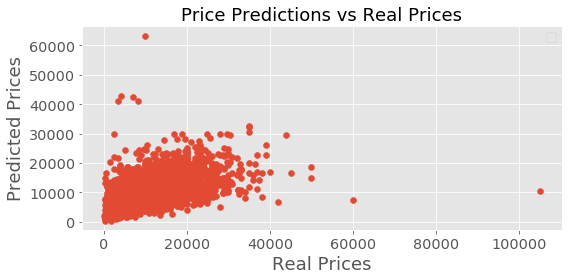

In [28]:
plt.scatter(y1_test, y_pred)
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

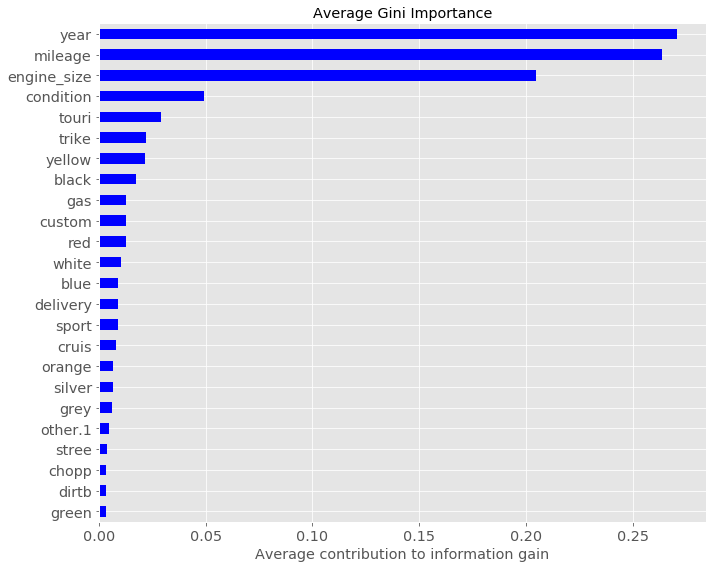

In [29]:
feat_scores = pd.Series(rf1.feature_importances_,
                           index=df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'dual-', 'brown', 'stand', 'bobbe', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot'], axis=1).columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');
plt.savefig("info_gain_first_pass.png") 
plt.tight_layout()

In [30]:
for idx, i in enumerate(df['price']):
    if i > 40000:
        df.drop(idx, axis=0, inplace = True)

In [31]:
df = df.reset_index(drop=True)

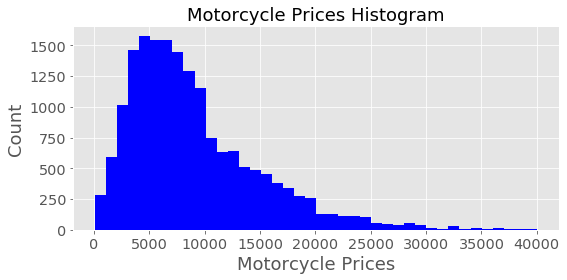

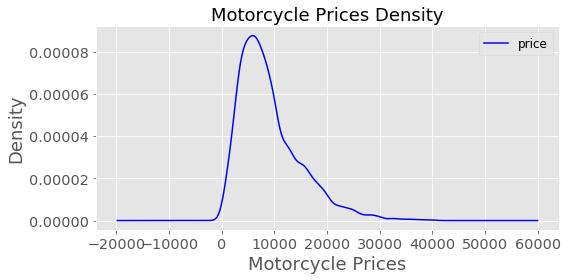

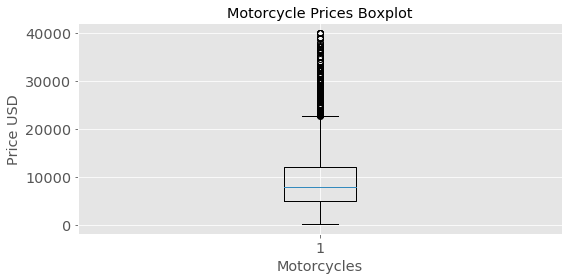

In [32]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.hist(df['price'], color = 'blue', bins = 40)
plt.xlabel("Motorcycle Prices", fontsize=18)
plt.ylabel("Count", fontsize=18);
plt.title("Motorcycle Prices Histogram", fontsize=18);
plt.tight_layout()
plt.show()

price=df['price'].astype(float)
price.plot.density(color ='blue')
plt.legend(fontsize=12)
plt.xlabel("Motorcycle Prices", fontsize=18)
plt.ylabel("Density", fontsize=18);
plt.title("Motorcycle Prices Density", fontsize=18);
plt.tight_layout()
plt.show()


params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.boxplot(df['price'].array)
plt.xlabel("Motorcycles")
plt.ylabel("Price USD")
plt.title("Motorcycle Prices Boxplot")
plt.tight_layout()
plt.show()

In [33]:
X1 = df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'dual-', 'brown', 'stand', 'bobbe', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot', 'yellow', 'chopp', 'dirtb', 'stree', 'gas'], axis=1)
y1 = df['price']

In [34]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.33, random_state=0)

rf1 = RandomForestRegressor(n_estimators=200, oob_score=True)
rf1.fit(X1_train, y1_train)
y_pred = rf1.predict(X1_test)

In [35]:
print('R Squared : ','\t\t', rf1.score(X1_test, y1_test))
print('Out of Bag Score : ','\t', rf1.oob_score_)
print('Mean Squared Error : ', mean_squared_error(y1_test, y_pred))

R Squared :  		 0.42824758416944314
Out of Bag Score :  	 0.4401546114694591
Mean Squared Error :  20232737.091961153


In [36]:
np.sqrt(mean_squared_error(y1_test, y_pred))

4498.081490142342

In [37]:
diff_percent = []
diff = []
for idx,_ in enumerate(y1_test):
    diff_ = _-y_pred[idx]
    diff.append(diff_)
    diff_percent.append(abs(diff_/_))

No handles with labels found to put in legend.


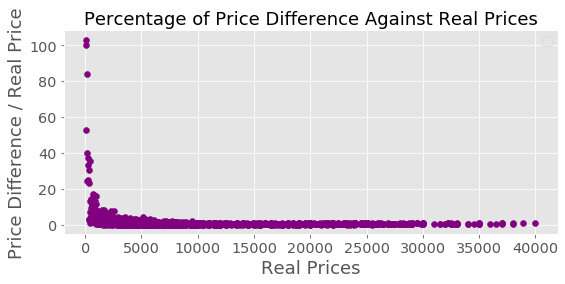

In [38]:
plt.scatter(y1_test, diff_percent, color='purple')
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Price Difference / Real Price", fontsize=18);
plt.title("Percentage of Price Difference Against Real Prices", fontsize=18);
plt.tight_layout()

No handles with labels found to put in legend.


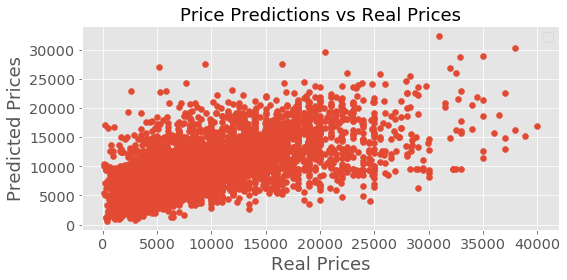

In [39]:
plt.scatter(y1_test, y_pred)

plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

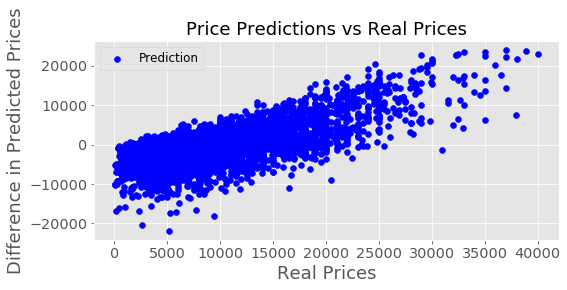

In [40]:
plt.scatter(y1_test, diff, color='b', label = 'Prediction')
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Difference in Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

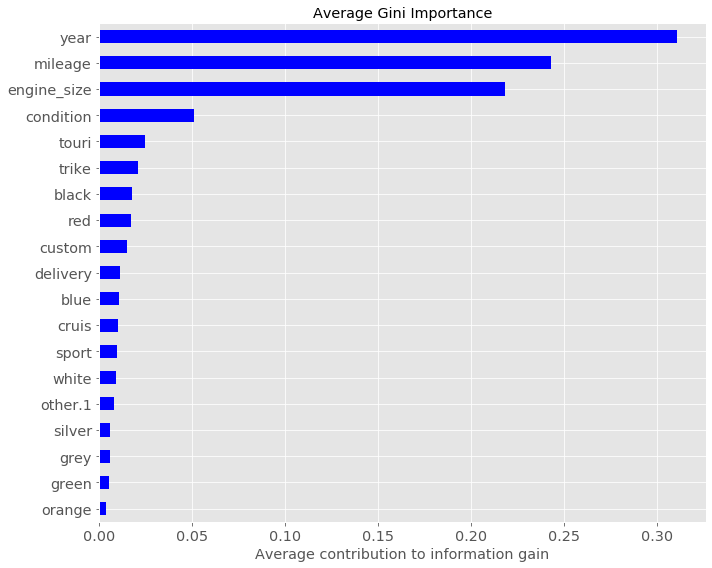

In [41]:
feat_scores = pd.Series(rf1.feature_importances_,
                           index=df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'dual-', 'brown', 'stand', 'bobbe', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot', 'yellow', 'chopp', 'dirtb', 'stree', 'gas'], axis=1).columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');
plt.savefig("info_gain_first_pass.png") 
plt.tight_layout()

In [42]:
diff_percent = []
diff = []
pos_or_neg = []
for idx,_ in enumerate(y1_test):
    diff_ = abs(_-y_pred[idx])
    if _-y_pred[idx] > 0:
        pos_or_neg.append('over +')
    elif _-y_pred[idx] < 0:
        pos_or_neg.append('short -')
    else:
        pos_or_neg.append('')
    
    diff.append(diff_)
    diff_percent.append(abs(diff_/_))

In [43]:
pos_or_neg

['over +',
 'over +',
 'short -',
 'over +',
 'short -',
 'short -',
 'short -',
 'over +',
 'over +',
 'short -',
 'over +',
 'over +',
 'over +',
 'over +',
 'short -',
 'short -',
 'over +',
 'over +',
 'short -',
 'over +',
 'short -',
 'short -',
 'over +',
 'short -',
 'short -',
 'over +',
 'over +',
 'short -',
 'short -',
 'short -',
 'over +',
 'short -',
 'over +',
 'short -',
 'over +',
 'over +',
 'over +',
 'over +',
 'short -',
 'over +',
 'short -',
 'short -',
 'short -',
 'short -',
 'short -',
 'over +',
 'over +',
 'over +',
 'short -',
 'short -',
 'short -',
 'short -',
 'short -',
 'over +',
 'short -',
 'short -',
 'short -',
 'over +',
 'over +',
 'over +',
 'short -',
 'short -',
 'over +',
 'short -',
 'over +',
 'over +',
 'over +',
 'over +',
 'over +',
 'over +',
 'short -',
 'over +',
 'over +',
 'over +',
 'over +',
 'over +',
 'short -',
 'short -',
 'over +',
 'short -',
 'short -',
 'over +',
 'short -',
 'over +',
 'short -',
 'over +',
 'over +',
 '

In [44]:
y_indices = []
for idx, _ in enumerate(y1_test):
    y_indices.append((y1_test.index[idx]))


analysis_df = pd.DataFrame(df.loc[[i for i in y_indices]])

# y1_test.index[9000]
# y_indices

In [45]:
analysis_df['diff'] = diff

In [46]:
analysis_df['diff_percent'] = diff_percent

In [47]:
analysis_df['pos_or_neg'] = pos_or_neg

In [48]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5796 entries, 14192 to 14868
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           5796 non-null   object 
 1   year            5796 non-null   float64
 2   price           5796 non-null   float64
 3   neighborhood    5189 non-null   object 
 4   description     5796 non-null   object 
 5   url             5796 non-null   object 
 6   model           5796 non-null   object 
 7   vin             5796 non-null   int64  
 8   condition       5796 non-null   int64  
 9   cryptocurrency  5796 non-null   int64  
 10  delivery        5796 non-null   int64  
 11  engine_size     5796 non-null   float64
 12  fuel_type       5568 non-null   object 
 13  mileage         5796 non-null   float64
 14  color           5784 non-null   object 
 15  street_legal    5796 non-null   int64  
 16  title_status    5794 non-null   object 
 17  transmission    5796 non-nul

In [49]:
col_name0 = 'pos_or_neg'
col_name1 = 'diff'
col_name2 = 'diff_percent'
col_name4 = 'year'
col_name5 = 'mileage'
col_name6 = 'engine_size'
col_name7 = 'condition'
zero_col = analysis_df.pop(col_name0)
first_col = analysis_df.pop(col_name1)
sec_col = analysis_df.pop(col_name2)
fourth_col = analysis_df.pop(col_name4)
fifth_col = analysis_df.pop(col_name5)
sixth_col = analysis_df.pop(col_name6)
seventh_col = analysis_df.pop(col_name7)
analysis_df.insert(1, col_name0, zero_col)
analysis_df.insert(2, col_name1, first_col)
analysis_df.insert(3, col_name2, sec_col)
analysis_df.insert(5, col_name4, fourth_col)
analysis_df.insert(6, col_name5, fifth_col)
analysis_df.insert(7, col_name6, sixth_col)
analysis_df.insert(8, col_name7, seventh_col) 

In [50]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5796 entries, 14192 to 14868
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           5796 non-null   object 
 1   pos_or_neg      5796 non-null   object 
 2   diff            5796 non-null   float64
 3   diff_percent    5796 non-null   float64
 4   price           5796 non-null   float64
 5   year            5796 non-null   float64
 6   mileage         5796 non-null   float64
 7   engine_size     5796 non-null   float64
 8   condition       5796 non-null   int64  
 9   neighborhood    5189 non-null   object 
 10  description     5796 non-null   object 
 11  url             5796 non-null   object 
 12  model           5796 non-null   object 
 13  vin             5796 non-null   int64  
 14  cryptocurrency  5796 non-null   int64  
 15  delivery        5796 non-null   int64  
 16  fuel_type       5568 non-null   object 
 17  color           5784 non-nul

In [51]:
adf_idx = analysis_df['diff'].sort_values().index

In [52]:
df.engine_size[1879]

895.5236939583598

In [53]:
analysis_df.loc[adf_idx][-50:]

,title,pos_or_neg,diff,diff_percent,price,year,mileage,engine_size,condition,neighborhood,...,purple,red,silver,white,yellow,diesel,electric,gas,hybrid,other.1
3635,2019 Harley-Davidson Street Glide® Special Tou...,over +,16254.847203,0.650506,24988.0,2019.0,0.000000,895.523694,3,"Cotati, CA",...,0,0,0,0,0,0,0,1,0,0
17395,1946 Knucklehead Harley,over +,16284.475000,0.581588,28000.0,1946.0,14077.353486,895.523694,3,Montello,...,0,0,0,0,0,0,0,1,0,0
10589,2019 Harley Davidson Street Glide Special - FLHXS,over +,16328.245000,0.502408,32500.0,2019.0,2700.000000,895.523694,3,Ballwin,...,0,0,0,0,0,0,0,1,0,0
1347,New 2020 Indian Motorcycle® Chieftain® Elite T...,over +,16459.208968,0.470277,34999.0,2020.0,9.000000,895.523694,6,"Tucson, AZ",...,0,0,0,0,0,0,0,1,0,0
17060,2019 Cam Am Ryker 3 Wheel Automatic Trike,short -,16655.601488,2.163065,7700.0,2019.0,14077.353486,895.523694,5,NaN,...,0,0,0,0,0,0,0,1,0,0
6591,RENT MY HARLEY 2020 ROADGLIDE,short -,16823.142754,84.115714,200.0,2020.0,14077.353486,895.523694,6,Largo,...,0,1,0,0,0,0,0,1,0,0
15693,2016 Harley-Davidson® FLTRUSE - Screamin' Eagl...,over +,16914.805000,0.513348,32950.0,2016.0,20815.000000,895.523694,3,"Farmers Branch, TX",...,0,0,0,0,0,0,0,1,0,0
10504,2019 Honda® Metropolitan,short -,16937.717291,7.367428,2299.0,2019.0,2.000000,895.523694,6,"Joplin, Mo",...,0,0,0,0,0,0,0,1,0,0
10840,2014 *Harley-Davidson* *FLHX* Blue,over +,16989.240000,0.679706,24995.0,2014.0,20329.000000,895.523694,3,The Internet Car Lot,...,0,0,0,0,0,0,0,1,0,0
10980,2019 Honda® CBR650R,short -,17072.875000,2.955830,5776.0,2019.0,1885.000000,895.523694,3,"Las Vegas, NV",...,0,1,0,0,0,0,0,1,0,0


In [54]:
df = df[df.engine_size != 895.5236939583598]

In [55]:
len(df)

8042

In [56]:
X1 = df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'dual-', 'brown', 'stand', 'bobbe', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot', 'yellow', 'chopp', 'dirtb', 'stree', 'gas'], axis=1)
y1 = df['price']

In [57]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.33, random_state=0)

rf1 = RandomForestRegressor(n_estimators=200, oob_score=True)
rf1.fit(X1_train, y1_train)
y_pred = rf1.predict(X1_test)

In [58]:
print('R Squared : ','\t\t', rf1.score(X1_test, y1_test))
print('Out of Bag Score : ','\t', rf1.oob_score_)
print('Mean Squared Error Score : ', np.sqrt(mean_squared_error(y1_test, y_pred)))

R Squared :  		 0.6778802873263221
Out of Bag Score :  	 0.7032626543684917
Mean Squared Error Score :  3007.8239663795284


In [59]:
diff_percent = []
diff = []
for idx,_ in enumerate(y1_test):
    diff_ = _-y_pred[idx]
    diff.append(diff_)
    diff_percent.append(abs(diff_/_))

No handles with labels found to put in legend.


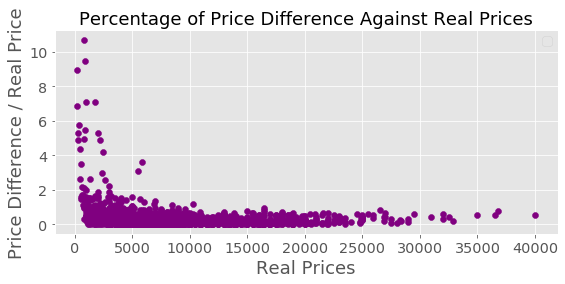

In [60]:
plt.scatter(y1_test, diff_percent, color='purple')
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Price Difference / Real Price", fontsize=18);
plt.title("Percentage of Price Difference Against Real Prices", fontsize=18);
plt.tight_layout()

No handles with labels found to put in legend.


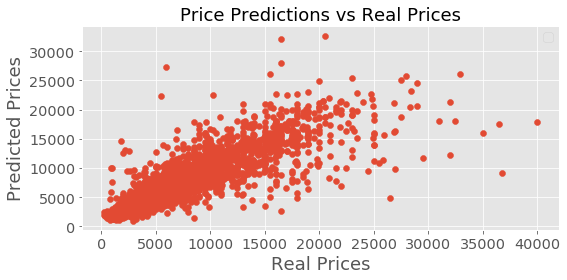

In [61]:
plt.scatter(y1_test, y_pred)

plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

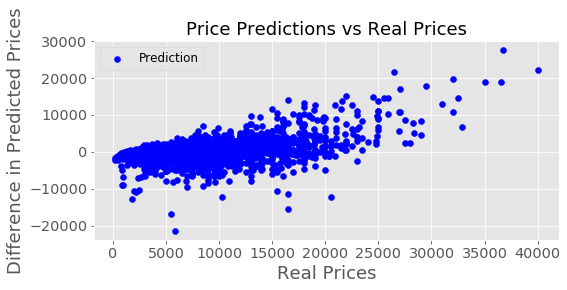

In [62]:
plt.scatter(y1_test, diff, color='b', label = 'Prediction')
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Difference in Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

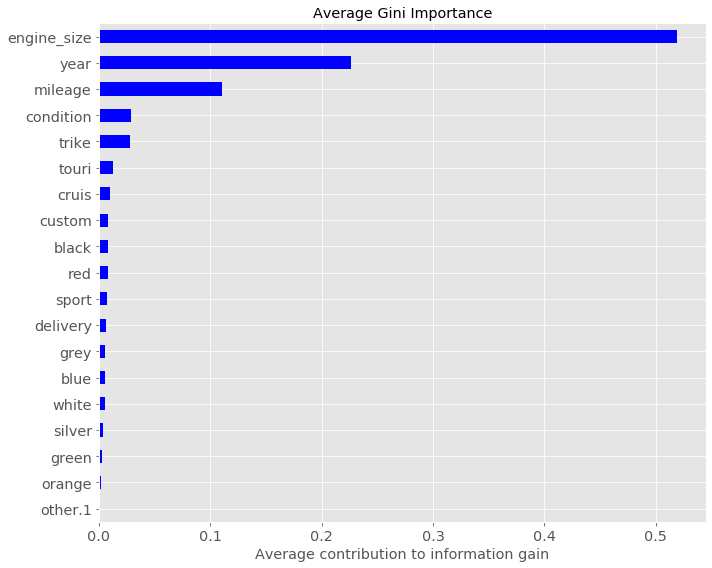

In [63]:
feat_scores = pd.Series(rf1.feature_importances_,
                           index=df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'dual-', 'brown', 'stand', 'bobbe', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot', 'yellow', 'chopp', 'dirtb', 'stree', 'gas'], axis=1).columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');
plt.savefig("info_gain_first_pass.png") 
plt.tight_layout()

In [64]:
diff_percent = []
diff = []
pos_or_neg = []
for idx,_ in enumerate(y1_test):
    diff_ = abs(_-y_pred[idx])
    if _-y_pred[idx] > 0:
        pos_or_neg.append('over +')
    elif _-y_pred[idx] < 0:
        pos_or_neg.append('short -')
    else:
        pos_or_neg.append('')
    
    diff.append(diff_)
    diff_percent.append(abs(diff_/_))

In [65]:
pos_or_neg

['short -',
 'short -',
 'over +',
 'short -',
 'over +',
 'over +',
 'short -',
 'over +',
 'short -',
 'short -',
 'short -',
 'over +',
 'over +',
 'short -',
 'short -',
 'short -',
 'short -',
 'over +',
 'over +',
 'over +',
 'short -',
 'short -',
 'short -',
 'short -',
 'short -',
 'over +',
 'short -',
 'short -',
 'short -',
 'short -',
 'over +',
 'over +',
 'short -',
 'short -',
 'short -',
 'short -',
 'short -',
 'short -',
 'over +',
 'over +',
 'short -',
 'short -',
 'short -',
 'short -',
 'short -',
 'short -',
 'over +',
 'over +',
 'over +',
 'short -',
 'short -',
 'over +',
 'over +',
 'over +',
 'short -',
 'over +',
 'short -',
 'over +',
 'short -',
 'short -',
 'short -',
 'short -',
 'short -',
 'short -',
 'short -',
 'over +',
 'over +',
 'short -',
 'over +',
 'over +',
 'over +',
 'short -',
 'over +',
 'short -',
 'short -',
 'short -',
 'over +',
 'short -',
 'over +',
 'short -',
 'over +',
 'short -',
 'over +',
 'short -',
 'over +',
 'over +',
 '

In [66]:
y_indices = []
for idx, _ in enumerate(y1_test):
    y_indices.append((y1_test.index[idx]))


analysis_df = pd.DataFrame(df.loc[[i for i in y_indices]])

# y1_test.index[9000]
# y_indices

In [67]:
analysis_df['diff'] = diff

In [68]:
analysis_df['diff_percent'] = diff_percent

In [69]:
analysis_df['pos_or_neg'] = pos_or_neg

In [70]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2654 entries, 2555 to 14783
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2654 non-null   object 
 1   year            2654 non-null   float64
 2   price           2654 non-null   float64
 3   neighborhood    2496 non-null   object 
 4   description     2654 non-null   object 
 5   url             2654 non-null   object 
 6   model           2654 non-null   object 
 7   vin             2654 non-null   int64  
 8   condition       2654 non-null   int64  
 9   cryptocurrency  2654 non-null   int64  
 10  delivery        2654 non-null   int64  
 11  engine_size     2654 non-null   float64
 12  fuel_type       2654 non-null   object 
 13  mileage         2654 non-null   float64
 14  color           2654 non-null   object 
 15  street_legal    2654 non-null   int64  
 16  title_status    2654 non-null   object 
 17  transmission    2654 non-null

In [71]:
col_name0 = 'pos_or_neg'
col_name1 = 'diff'
col_name2 = 'diff_percent'
col_name4 = 'year'
col_name5 = 'mileage'
col_name6 = 'engine_size'
col_name7 = 'condition'
zero_col = analysis_df.pop(col_name0)
first_col = analysis_df.pop(col_name1)
sec_col = analysis_df.pop(col_name2)
fourth_col = analysis_df.pop(col_name4)
fifth_col = analysis_df.pop(col_name5)
sixth_col = analysis_df.pop(col_name6)
seventh_col = analysis_df.pop(col_name7)
analysis_df.insert(1, col_name0, zero_col)
analysis_df.insert(2, col_name1, first_col)
analysis_df.insert(3, col_name2, sec_col)
analysis_df.insert(5, col_name4, fourth_col)
analysis_df.insert(6, col_name5, fifth_col)
analysis_df.insert(7, col_name6, sixth_col)
analysis_df.insert(8, col_name7, seventh_col) 

In [72]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2654 entries, 2555 to 14783
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2654 non-null   object 
 1   pos_or_neg      2654 non-null   object 
 2   diff            2654 non-null   float64
 3   diff_percent    2654 non-null   float64
 4   price           2654 non-null   float64
 5   year            2654 non-null   float64
 6   mileage         2654 non-null   float64
 7   engine_size     2654 non-null   float64
 8   condition       2654 non-null   int64  
 9   neighborhood    2496 non-null   object 
 10  description     2654 non-null   object 
 11  url             2654 non-null   object 
 12  model           2654 non-null   object 
 13  vin             2654 non-null   int64  
 14  cryptocurrency  2654 non-null   int64  
 15  delivery        2654 non-null   int64  
 16  fuel_type       2654 non-null   object 
 17  color           2654 non-null

In [73]:
adf_idx = analysis_df['diff'].sort_values().index

In [74]:
len(analysis_df)

2654

In [75]:
analysis_df.loc[adf_idx][-50:]

,title,pos_or_neg,diff,diff_percent,price,year,mileage,engine_size,condition,neighborhood,...,purple,red,silver,white,yellow,diesel,electric,gas,hybrid,other.1
9688,2013 Victory XC,over +,9740.675000,0.391192,24900.0,2013.0,18000.000000,1890.0,4,Fargo,...,0,0,0,1,0,0,0,1,0,0
9715,2007 Big Dog k9 chopper,over +,9958.605000,0.569063,17500.0,2007.0,4976.000000,1916.0,3,Howard Lake,...,0,0,0,0,0,0,0,1,0,0
492,2015 Harley Tri Glide,over +,9964.090000,0.433221,23000.0,2015.0,4477.000000,1688.0,5,Goodyear,...,0,0,0,0,0,0,0,1,0,0
10571,2009 Harley Davidson Screaming Eagle Softtail ...,over +,10062.905000,0.543941,18500.0,2009.0,7000.000000,1800.0,4,Troy,...,0,0,0,0,1,0,0,1,0,0
10429,2016 Harley Davidson FLTRUSE CVO Road Glide Ultra,over +,10202.485000,0.393918,25900.0,2016.0,7600.000000,1800.0,5,"St. Joseph, MO",...,0,0,0,0,0,0,0,1,0,0
15937,2004 Harley Davidson Ultra Classic Trike,over +,10267.005000,0.570389,18000.0,2004.0,15550.000000,1340.0,5,NaN,...,0,0,0,0,0,0,0,1,0,0
14349,1979 Harley-Davidson FXE Fatbob “Wet Lilly” Cu...,over +,10336.165000,0.608189,16995.0,1979.0,0.000000,1340.0,5,Zieglerville,...,0,0,0,0,0,0,0,1,0,0
2286,2006 Ducati Sport Classic,over +,10367.300000,0.671023,15450.0,2006.0,8000.000000,1000.0,4,Venice,...,0,0,0,0,0,0,0,1,0,0
10696,2020 Honda crf110f,short -,10432.355000,4.172942,2500.0,2020.0,14077.353486,110.0,5,Butte,...,0,0,0,0,0,0,0,1,0,0
5478,2018 Harley Davidson Heritage Softail,short -,10535.145000,0.679687,15500.0,2018.0,6500.000000,114.0,5,McLean,...,0,0,0,0,0,0,0,1,0,0


In [76]:
analysis_df['mileage'][1:2]

4377    14077.353486
Name: mileage, dtype: float64

In [127]:
df = df[df.mileage != 14077.35348599088]
df = df[df.engine_size > 45]

In [128]:
len(df)

6896

In [150]:
X1 = df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'dual-', 'brown', 'stand', 'bobbe', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot', 'yellow', 'chopp', 'dirtb', 'stree', 'gas', 'other.1', 'orange', 'green', 'grey', 'silver', 'white', 'blue', 'custom', 'black', 'red'], axis=1)
y1 = df['price']

In [151]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.33, random_state=0)

rf1 = RandomForestRegressor(n_estimators=200, oob_score=True)
rf1.fit(X1_train, y1_train)
y_pred = rf1.predict(X1_test)

In [152]:
print('R Squared : ','\t\t', rf1.score(X1_test, y1_test))
print('Out of Bag Score : ','\t', rf1.oob_score_)
print('Mean Squared Error Score : ', np.sqrt(mean_squared_error(y1_test, y_pred)))

R Squared :  		 0.7274759897818672
Out of Bag Score :  	 0.7053985430366785
Mean Squared Error Score :  2765.9390184375484


In [153]:
diff_percent = []
diff = []
for idx,_ in enumerate(y1_test):
    diff_ = _-y_pred[idx]
    diff.append(diff_)
    diff_percent.append(abs(diff_/_))

No handles with labels found to put in legend.


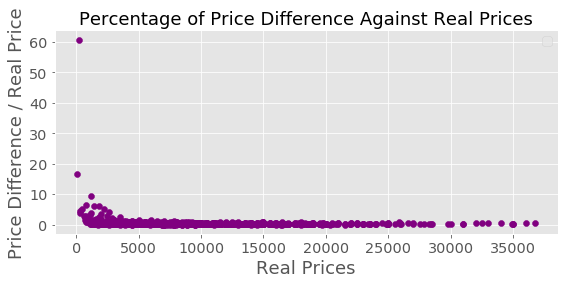

In [154]:
plt.scatter(y1_test, diff_percent, color='purple')
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Price Difference / Real Price", fontsize=18);
plt.title("Percentage of Price Difference Against Real Prices", fontsize=18);
plt.tight_layout()

No handles with labels found to put in legend.


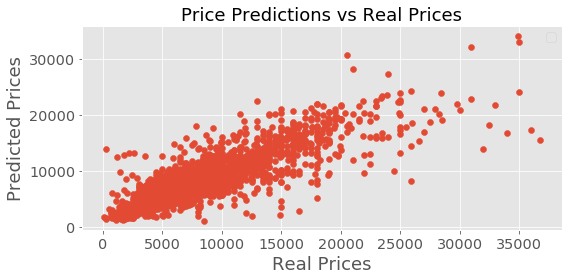

In [155]:
plt.scatter(y1_test, y_pred)

plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

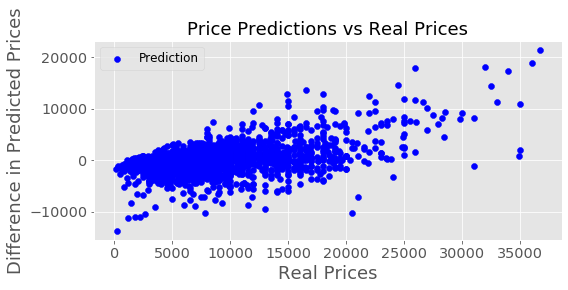

In [156]:
plt.scatter(y1_test, diff, color='b', label = 'Prediction')
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Difference in Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

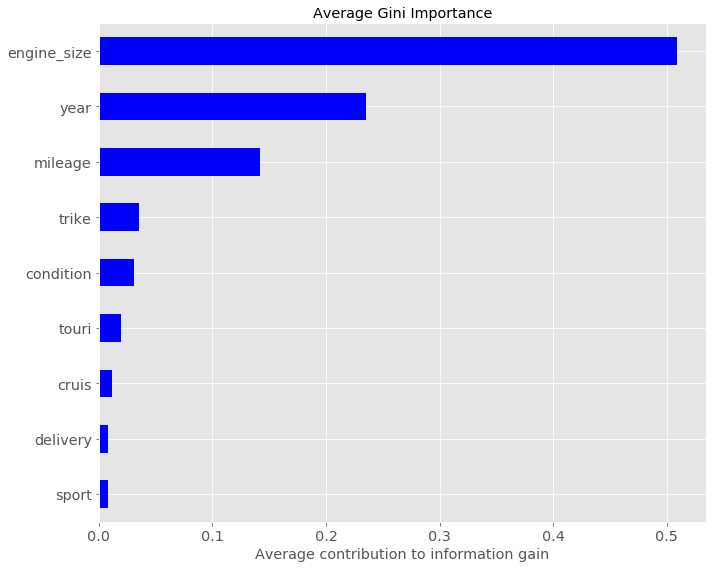

In [157]:
feat_scores = pd.Series(rf1.feature_importances_,
                           index=df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'dual-', 'brown', 'stand', 'bobbe', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot', 'yellow', 'chopp', 'dirtb', 'stree', 'gas', 'other.1', 'orange', 'green', 'grey', 'silver', 'white', 'blue', 'custom', 'black', 'red'], axis=1).columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');
plt.savefig("info_gain_first_pass.png") 
plt.tight_layout()

In [175]:
diff_percent = []
diff = []
pos_or_neg = []
for idx,_ in enumerate(y1_test):
    diff_ = abs(_-y_pred[idx])
    if _-y_pred[idx] > 0:
        pos_or_neg.append('short -')
    elif _-y_pred[idx] < 0:
        pos_or_neg.append('over +')
    else:
        pos_or_neg.append('')
    
    diff.append(diff_)
    diff_percent.append(abs(diff_/_))

In [176]:
y_indices = []
for idx, _ in enumerate(y1_test):
    y_indices.append((y1_test.index[idx]))


analysis_df = pd.DataFrame(df.loc[[i for i in y_indices]])

# y1_test.index[9000]
# y_indices

In [177]:
analysis_df['diff'] = diff

In [178]:
analysis_df['diff_percent'] = diff_percent

In [179]:
analysis_df['pos_or_neg'] = pos_or_neg

In [180]:
analysis_df['y_pred'] = y_pred

In [181]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2276 entries, 8224 to 16262
Data columns (total 54 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2276 non-null   object 
 1   year            2276 non-null   float64
 2   price           2276 non-null   float64
 3   neighborhood    2147 non-null   object 
 4   description     2276 non-null   object 
 5   url             2276 non-null   object 
 6   model           2276 non-null   object 
 7   vin             2276 non-null   int64  
 8   condition       2276 non-null   int64  
 9   cryptocurrency  2276 non-null   int64  
 10  delivery        2276 non-null   int64  
 11  engine_size     2276 non-null   float64
 12  fuel_type       2276 non-null   object 
 13  mileage         2276 non-null   float64
 14  color           2276 non-null   object 
 15  street_legal    2276 non-null   int64  
 16  title_status    2276 non-null   object 
 17  transmission    2276 non-null

In [182]:
col_name0 = 'pos_or_neg'
col_name1 = 'diff'
col_name2 = 'diff_percent'
col_name3 = 'y_pred'
col_name4 = 'year'
col_name5 = 'mileage'
col_name6 = 'engine_size'
col_name7 = 'condition'
zero_col = analysis_df.pop(col_name0)
first_col = analysis_df.pop(col_name1)
sec_col = analysis_df.pop(col_name2)
third_col = analysis_df.pop(col_name3)
fourth_col = analysis_df.pop(col_name4)
fifth_col = analysis_df.pop(col_name5)
sixth_col = analysis_df.pop(col_name6)
seventh_col = analysis_df.pop(col_name7)
analysis_df.insert(1, col_name0, zero_col)
analysis_df.insert(2, col_name1, first_col)
analysis_df.insert(3, col_name2, sec_col)
analysis_df.insert(5, col_name3, third_col)
analysis_df.insert(6, col_name4, fourth_col)
analysis_df.insert(7, col_name5, fifth_col)
analysis_df.insert(8, col_name6, sixth_col)
analysis_df.insert(9, col_name7, seventh_col) 

In [183]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2276 entries, 8224 to 16262
Data columns (total 54 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2276 non-null   object 
 1   pos_or_neg      2276 non-null   object 
 2   diff            2276 non-null   float64
 3   diff_percent    2276 non-null   float64
 4   price           2276 non-null   float64
 5   y_pred          2276 non-null   float64
 6   year            2276 non-null   float64
 7   mileage         2276 non-null   float64
 8   engine_size     2276 non-null   float64
 9   condition       2276 non-null   int64  
 10  neighborhood    2147 non-null   object 
 11  description     2276 non-null   object 
 12  url             2276 non-null   object 
 13  model           2276 non-null   object 
 14  vin             2276 non-null   int64  
 15  cryptocurrency  2276 non-null   int64  
 16  delivery        2276 non-null   int64  
 17  fuel_type       2276 non-null

In [187]:
adf_idx = analysis_df['diff_percent'].sort_values().index

In [188]:
len(analysis_df)

2276

In [200]:
analysis_df.loc[adf_idx][-50:]

,title,pos_or_neg,diff,diff_percent,price,y_pred,year,mileage,engine_size,condition,...,purple,red,silver,white,yellow,diesel,electric,gas,hybrid,other.1
12150,Honda Super Cub 2019,over +,3752.905000,1.072259,3500.0,7252.905000,2019.0,478.0,125.0,5,...,0,0,0,0,0,0,0,1,0,0
15923,2012 Triumph Thunderbird Cruiser Low Miles,over +,6386.135000,1.084233,5890.0,12276.135000,2012.0,2381.0,1597.0,3,...,0,0,0,0,0,0,0,1,0,0
2765,2006 Yamaha Road Star,over +,3915.640000,1.087678,3600.0,7515.640000,2006.0,21500.0,1700.0,4,...,0,0,0,0,0,0,0,1,0,0
10780,1998 Yamaha FZR600R,over +,1368.200000,1.094560,1250.0,2618.200000,1998.0,22280.0,600.0,3,...,0,0,0,0,0,0,0,1,0,0
14042,2017 Yamaha Bolt 950cc,over +,4550.785000,1.137696,4000.0,8550.785000,2017.0,1994.0,950.0,4,...,0,0,0,0,0,0,0,1,0,0
16747,Very original 1984 VF700C Magna,over +,4413.775000,1.161520,3800.0,8213.775000,1984.0,10859.0,70.0,4,...,0,1,0,0,0,0,0,1,0,0
4430,03 Yamaha Warrior,over +,7641.725000,1.175650,6500.0,14141.725000,2020.0,9724.0,1700.0,5,...,0,0,0,0,0,0,0,1,0,0
13483,2006 Honda VTX 1800C,over +,5294.610000,1.176580,4500.0,9794.610000,2006.0,12000.0,1800.0,4,...,0,0,0,0,0,0,0,1,0,0
15127,1982 Yamaha Maxim 1100cc,over +,1444.600000,1.203833,1200.0,2644.600000,1982.0,21000.0,1100.0,3,...,0,1,0,0,0,0,0,1,0,0
801,Restored Honda CT90,over +,2293.695000,1.207208,1900.0,4193.695000,1990.0,9601.0,90.0,4,...,0,0,0,0,0,0,0,1,0,0


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6896 entries, 1 to 17561
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           6896 non-null   object 
 1   year            6896 non-null   float64
 2   price           6896 non-null   float64
 3   neighborhood    6510 non-null   object 
 4   description     6896 non-null   object 
 5   url             6896 non-null   object 
 6   model           6896 non-null   object 
 7   vin             6896 non-null   int64  
 8   condition       6896 non-null   int64  
 9   cryptocurrency  6896 non-null   int64  
 10  delivery        6896 non-null   int64  
 11  engine_size     6896 non-null   float64
 12  fuel_type       6896 non-null   object 
 13  mileage         6896 non-null   float64
 14  color           6896 non-null   object 
 15  street_legal    6896 non-null   int64  
 16  title_status    6896 non-null   object 
 17  transmission    6896 non-null   